In [1]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np

In [3]:
# Read in data
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# list(df.columns)

Using an appropriate visualization, check the effect of Mean Annual Temperature (Temp_ann) on the presence of Salmo trutta fario (Brown Trout).
Salmo trutta fario column indicates occurances of the trout at each site

In [13]:
# Filter df to only include brown trout data
filtered_df = df.loc[:, list(df.loc[:, :'Total_sp'].columns) + ['Salmo trutta fario']]
pd.set_option('display.max_columns', None)
filtered_df.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,Calib_morphol,Calib_wqual,Geomorph1,Geomorph2,Geomorph3,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,Barriers_catchment_down,Barriers_river_segment_up,Barriers_river_segment_down,Barriers_number_river_segment_up,Barriers_number_river_segment_down,Barriers_distance_river_segment_up,Barriers_distance_river_segment_down,Impoundment,Hydropeaking,Water_abstraction,Hydro_mod,Temperature_impact,Velocity_increase,Reservoir_flushing,Sedimentation,Channelisation,Cross_sec,Instream_habitat,Riparian_vegetation,Embankment,Floodprotection,Floodplain,Toxic_substances,Acidification,Water_quality_index,Eutrophication,Organic_pollution,Organic_siltation,Sum of Run1_number_all,Total_sp,Salmo trutta fario
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,1,1,-0.047266,-1.039638,0.451016,Pluvial,Permanent,199,Siliceous,0.001,3.0,700.840807,522.071164,17.6,8.5,28.1,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1,4.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,1,1,0.389648,-0.443332,0.489422,Groundwater,Permanent,1253,Calcareous,13.406,3.0,1603.519424,640.327779,9.3,0.6,18.9,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,7,1,1
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,1,1,0.344331,-0.504929,0.485476,Groundwater,Permanent,1155,Calcareous,9.398,3.0,1578.678579,633.238847,10.1,1.2,19.6,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,45,1,1
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,1,1,0.460283,-0.485457,-1.115365,Groundwater,Permanent,1074,Calcareous,8.186,3.0,1553.219128,625.841858,10.1,1.2,19.5,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,15,2,1
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,1,1,0.272000,-0.598013,0.479972,Groundwater,Permanent,1018,Calcareous,11.736,3.0,1539.684999,622.111415,10.3,1.7,20.0,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,5,2,1


<Axes: xlabel='Salmo trutta fario', ylabel='temp_ann'>

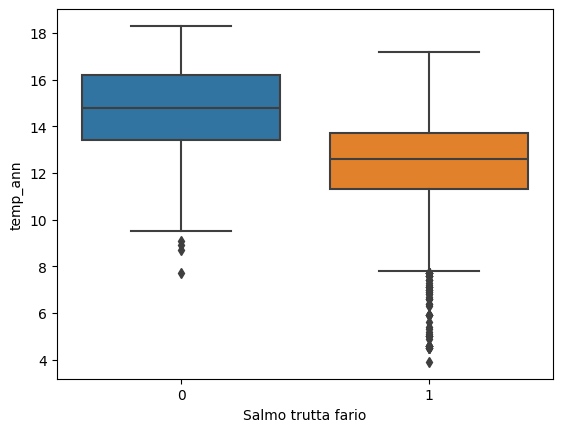

In [17]:
# Is presence of salmon just 0 or 1?
sns.boxplot(x=filtered_df["Salmo trutta fario"], y=filtered_df["temp_ann"])

In [18]:
# Scatterplot doesn't work because the values are 0 or 1 to indicate presence of the trout

In [25]:
filtered_df = filtered_df.replace([np.inf, -np.inf], np.nan).dropna(subset=["temp_ann", "Salmo trutta fario"])

Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a
normal distribution.

In [ ]:
# Histogram
# Q-Q plot
